# 第2章 確率分布と統計モデルの最尤推定

## 2.1 種子数の統計モデリング（p.14）

In [2]:
using Statistics
using Plots
using Printf

In [3]:
data = [
    2, 2, 4, 6, 4, 5, 2, 3, 1, 2,
    0, 4, 3, 3, 3, 3, 4, 2, 7, 2,
    4, 3, 3, 3, 4, 3, 7, 5, 3, 1,
    7, 6, 4, 6, 5, 2, 4, 7, 2, 2,
    6, 2, 4, 5, 4, 5, 1, 3, 2, 3];
length(data)

50

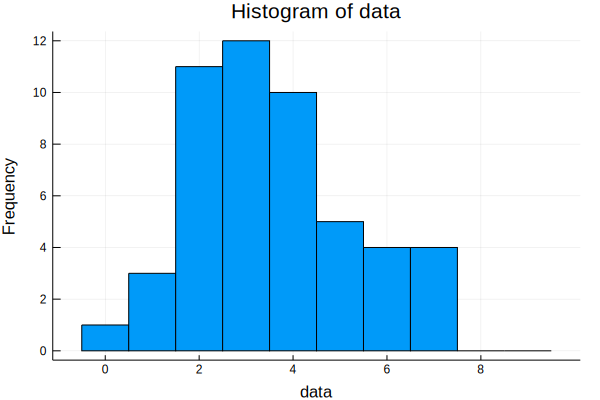

In [4]:
# ヒストグラム
histogram(data, bins=-0.5:9.5, xlabel="data", ylabel="Frequency", title="Histogram of data", xticks=0:2:8, yticks=0:2:12, legend=false)

In [5]:
# 標本分散（不偏分散, corrected=falseがデフォルトなので省略してもいい）
var(data, corrected=false)

2.9263999999999997

In [6]:
# 標本標準偏差
std(data)

1.728040060004279

## 2.2 データと確率分布の対応関係をながめる（p.18）

In [7]:
using Distributions

In [8]:
y = 0:9
prob = pdf.(Poisson(3.56), y)

10-element Array{Float64,1}:
 0.028438824714184505 
 0.10124221598249684  
 0.18021114444884437  
 0.21385055807929534  
 0.19032699669057287  
 0.1355128216436879   
 0.08040427417525477  
 0.04089131658055819  
 0.018196635878348365 
 0.0071977804141022395

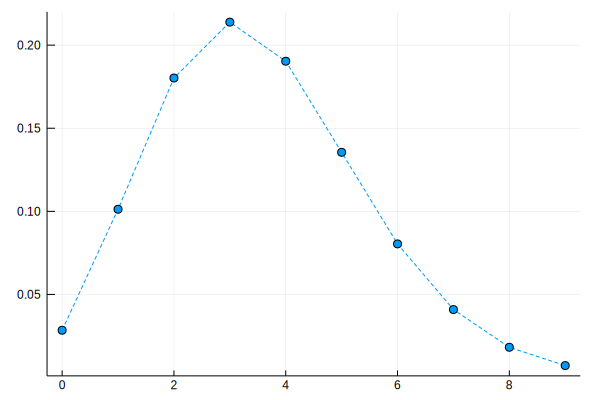

In [9]:
plot(y, prob, markershape=:auto, linestyle=:dash, legend=false)

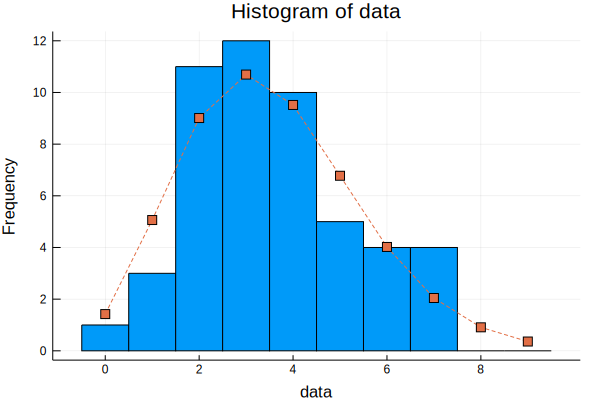

In [10]:
histogram(data, bins=-0.5:9.5, xlabel="data", ylabel="Frequency", title="Histogram of data", xticks=0:2:8, yticks=0:2:12, legend=false)
plot!(y, prob*50, markershape=:auto, linestyle=:dash)

## 2.3 ポアソン分布とは何か？（p.21）

$$ p\left(y|\lambda\right) = \frac{\lambda^y\exp\left(-\lambda\right)}{y!} $$

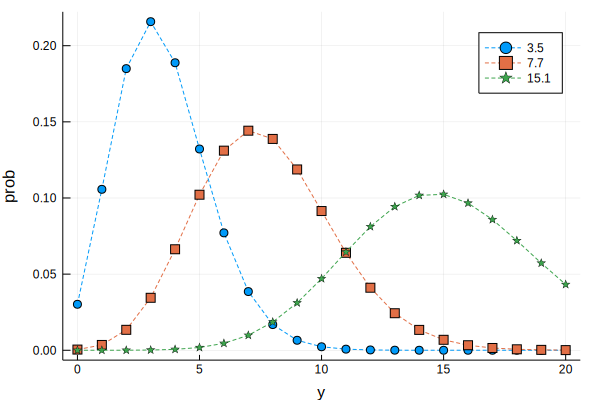

In [11]:
y = 0:20
plot(y, pdf.(Poisson(3.5), y), markershape=:auto, linestyle=:dash, xlabel="y", ylabel="prob", label="3.5")
plot!(y, pdf.(Poisson(7.7), y), markershape=:auto, linestyle=:dash, label="7.7")
plot!(y, pdf.(Poisson(15.1), y), markershape=:auto, linestyle=:dash, label="15.1")

## 2.4 ポアソン分布のパラメーターの最尤推定（p.24）

得られているデータ（観測値）からパラメータ（今回は$\lambda$）を推定する。**尤度**$L$は「得られたデータの事象がすべて同時に真である確率」なので、各データ$y_i$が得られる確率$p(y_i | \lambda)$の積になる。

$$ L\left(\lambda\right) = \prod_i p\left(y_i | \lambda\right) = \prod_i \frac{\lambda^{y_i}\exp\left(-\lambda\right)}{y_{i}!} $$

このままだと値が小さくなりすぎて精度が悪くなるなどいろいろ問題が。

In [12]:
# 例
prod(pdf.(Poisson(3.5), data))

5.706394934716174e-43

In [ ]:
y = 0:9
anim = @animate for lambda = [2:0.05:5  ; 4.9:-0.05:2.1]
histogram(data, bins=-0.5:9.5,
        xlabel="data", ylabel="Frequency", title=@sprintf("Histogram of data (lambda=%.2f)", lambda),
        xticks=0:2:8, yticks=0:2:14, ylim=(0,14), legend=false)
    prob = pdf.(Poisson(lambda), y)
    plot!(y, prob*50, markershape=:auto, linestyle=:dash)
end
gif(anim, "fig-2-7.gif")

![Figure 2.7](fig-2-7.gif)

**対数尤度**（_log-likelihood_）を使うと積を和にできるので計算が現実的に。

$$ \log_e L\left(\lambda\right) = \sum_i\left( \log_e p\left(y_i | \lambda\right) \right) = \sum_i\left( y_i\log_e\lambda - \lambda - \sum_k^{y_i}\log_e k \right) $$

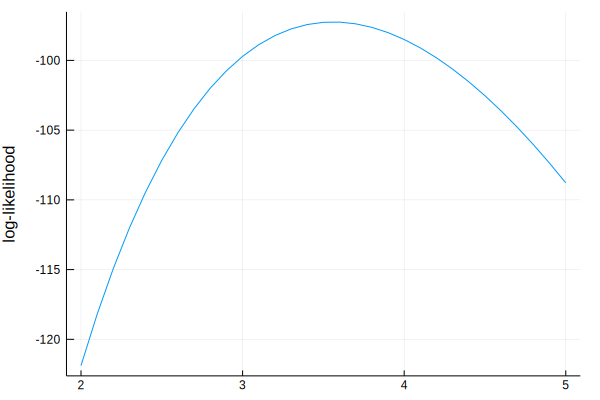

In [14]:
function logL(m, data)
    sum(log.(pdf.(Poisson(m), data)))
end

lambda = 2:0.1:5
plot(lambda, map(m -> logL(m, data), lambda), ylabel="log-likelihood", legend=false)

対数尤度関数$\log L\left(\lambda\right)$が最大になるところ（最ももっともらしい$\lambda$であるところ）を探す。

$$ \frac{\partial\log L\left(\lambda\right)}{\partial\lambda} = \sum_i \left(\frac{y_i}{\lambda} - 1\right) = \frac{1}{\lambda}\sum_i y_i - 50$$

これが0になる$\hat{\lambda}$を**最尤推定値**（_maximum likelihood estimate_）と呼び、今回はデータの標本平均である。

In [15]:
lambda_hat = mean(data)

3.56

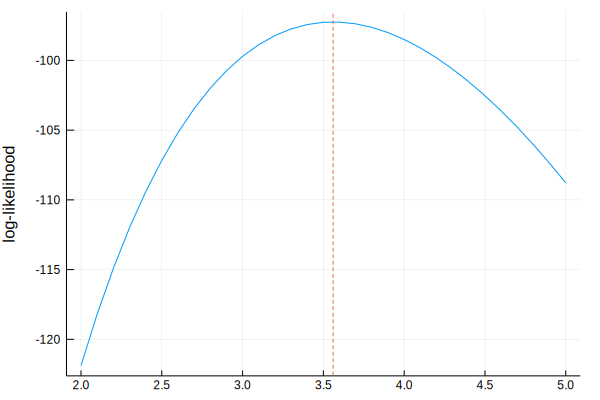

In [16]:
plot(lambda, map(m -> logL(m, data), lambda), ylabel="log-likelihood", legend=false, xticks=2.0:0.5:5.0)
vline!([lambda_hat], linestyle=:dash)

### 2.4.1 擬似乱数と最尤推定値のばらつき

In [17]:
rand(Poisson(3.5), 50)   # Rのrpoisに相当

50-element Array{Int64,1}:
 2
 4
 3
 7
 6
 3
 2
 3
 1
 1
 1
 6
 2
 0
 4
 8
 1
 5
 2
 4
 2
 2
 1
 8
 3
 6
 5
 4
 2
 2
 2
 2
 2
 1
 4
 3
 2
 4
 1
 4
 2
 6
 3
 3
 3
 3
 3
 3
 2
 7

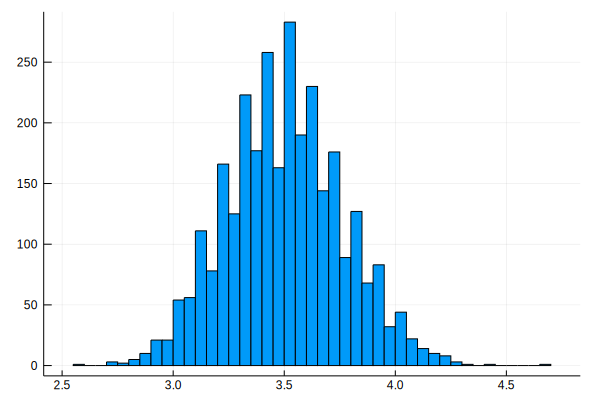

In [18]:
maxruns = 3000
lambda_hat = zeros(maxruns)
for n = 1:maxruns
    lambda_hat[n] = mean(rand(Poisson(3.5), 50))   # 最尤推定値は平均値
end
histogram(lambda_hat, legend=false)

この推定値のばらつきを**標準誤差**と呼ぶ。